<a href="https://colab.research.google.com/github/abishekraja018/SDC-GENAI/blob/main/DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8499 - loss: 0.5100 - val_accuracy: 0.9682 - val_loss: 0.1079
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9561 - loss: 0.1475 - val_accuracy: 0.9742 - val_loss: 0.0863
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9681 - loss: 0.1081 - val_accuracy: 0.9737 - val_loss: 0.0910
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9716 - loss: 0.0901 - val_accuracy: 0.9748 - val_loss: 0.0890
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9760 - loss: 0.0742 - val_accuracy: 0.9790 - val_loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0915

✅ Test Accuracy: 0.9752


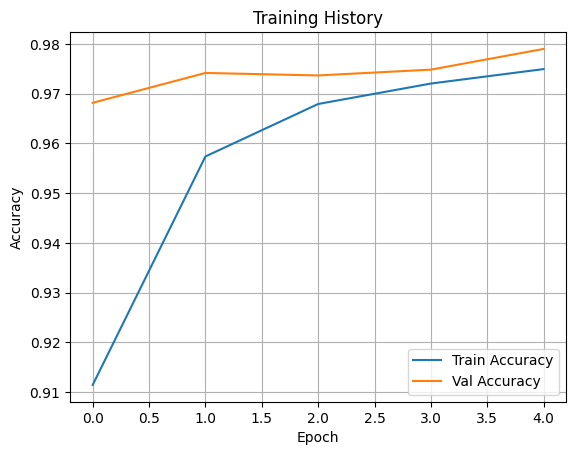

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


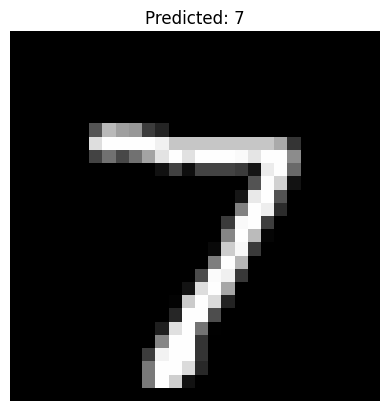

In [1]:
# 📦 Step 1: Install necessary packages
!pip install tensorflow --quiet

# 📚 Step 2: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 🧠 Step 3: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# 🧱 Step 4: Build the deep learning model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),        # Convert 2D image to 1D
    layers.Dense(128, activation='relu'),        # First hidden layer
    layers.Dropout(0.2),                         # Dropout for regularization
    layers.Dense(64, activation='relu'),         # Second hidden layer
    layers.Dense(10, activation='softmax')       # Output layer for 10 classes
])

# ⚙️ Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🏋️ Step 6: Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# 📊 Step 7: Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 📈 Step 8: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Step 9: Make a prediction
import numpy as np
predictions = model.predict(X_test)
sample_index = 0
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[sample_index])}")
plt.axis('off')
plt.show()
